## Reference example using Multi-Layer Perceptron
### This example does not use QAML or Boltzmann Machines
Developed by: Jose Pinilla

In [1]:
# Required packages
import torch

import matplotlib.pyplot as plt

import torchvision.datasets as torch_datasets
import torchvision.transforms as torch_transforms

In [2]:
################################# Hyperparameters ##############################
EPOCHS = 20
BATCH_SIZE = 64

# Stochastic Gradient Descent
learning_rate = 1e-3
weight_decay = 1e-4
momentum = 0.5

# N is batch size; D_in is input dimension;
# H is hidden dimension
N, D_in, H, D_out = 64, 784, 128, 10

TEST_SIZE = 400
TRAIN_SIZE = 2400

In [3]:
#################################### Input Data ################################
train_dataset = torch_datasets.MNIST(root='./data/', train=True,
                                     transform=torch_transforms.ToTensor(),
                                     download=True)
train_sampler = torch.utils.data.RandomSampler(train_dataset,num_samples=TRAIN_SIZE)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE,
                                           sampler=train_sampler)

test_dataset = torch_datasets.MNIST(root='./data/', train=False,
                                    transform=torch_transforms.ToTensor(),
                                    download=True)
test_sampler = torch.utils.data.RandomSampler(test_dataset,num_samples=TEST_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset,sampler=test_sampler)

In [4]:
################################## Model Training ##############################
model = torch.nn.Sequential(torch.nn.Linear(D_in, H),
                            torch.nn.ReLU(),
                            torch.nn.Linear(H, D_out),)
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [5]:
err_log = []
accuracy_log = []
for t in range(EPOCHS):
    for v_batch, labels_batch in train_loader:
        y_ref = torch.nn.functional.one_hot(labels_batch,10).float()
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(v_batch.view(len(v_batch),D_in))

        # Compute and print loss.
        loss = loss_fn(y_pred, y_ref)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the Tensors it will update
        # (which are the learnable weights of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to parameters
        loss.backward()

        # The step function on an Optimizer makes an update to its parameters
        optimizer.step()
    err_log.append(loss.item())
    print(f"Epoch {t} Loss = {loss.item()}")

    ############################## CLASSIFICATION ##############################
    count = 0
    for test_data, test_label in test_loader:
        label_pred = model(test_data.view(1,D_in)).argmax()
        if label_pred == test_label:
            count+=1
    accuracy_log.append(count/TEST_SIZE)
    print(f"Testing accuracy: {count}/{TEST_SIZE} ({count/TEST_SIZE:.2f})")

Epoch 0 Loss = 24.178735733032227
Testing accuracy: 231/400 (0.58)
Epoch 1 Loss = 18.934938430786133
Testing accuracy: 303/400 (0.76)
Epoch 2 Loss = 16.195180892944336
Testing accuracy: 321/400 (0.80)
Epoch 3 Loss = 16.23239517211914
Testing accuracy: 316/400 (0.79)
Epoch 4 Loss = 15.839576721191406
Testing accuracy: 333/400 (0.83)
Epoch 5 Loss = 13.149567604064941
Testing accuracy: 328/400 (0.82)
Epoch 6 Loss = 14.151419639587402
Testing accuracy: 333/400 (0.83)
Epoch 7 Loss = 11.760783195495605
Testing accuracy: 348/400 (0.87)
Epoch 8 Loss = 11.72308349609375
Testing accuracy: 344/400 (0.86)
Epoch 9 Loss = 13.685270309448242
Testing accuracy: 341/400 (0.85)
Epoch 10 Loss = 8.443955421447754
Testing accuracy: 355/400 (0.89)
Epoch 11 Loss = 9.048995018005371
Testing accuracy: 360/400 (0.90)
Epoch 12 Loss = 9.726346969604492
Testing accuracy: 357/400 (0.89)
Epoch 13 Loss = 9.326949119567871
Testing accuracy: 361/400 (0.90)
Epoch 14 Loss = 10.880500793457031
Testing accuracy: 362/400 (0.

Text(0.5, 0, 'Epoch')

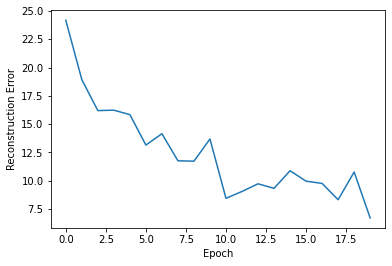

In [6]:
fig, ax = plt.subplots()
plt.plot(err_log)
plt.ylabel("Reconstruction Error")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

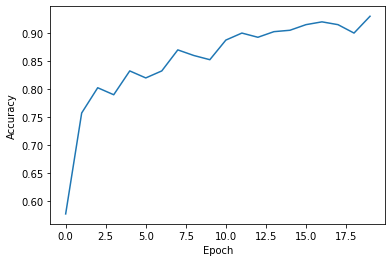

In [7]:
fig, ax = plt.subplots()
plt.plot(accuracy_log)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")